## Page Rank

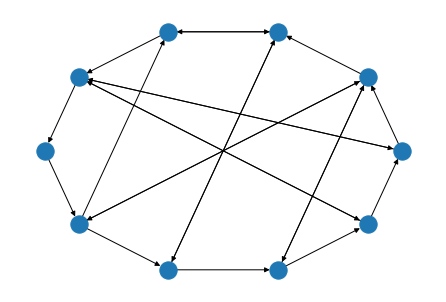

In [36]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


myWeb = nx.DiGraph()
myPages = range(1,10)


connections = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1),
              (1,5),(5,1),(9,2),(2,9),(2,7),(7,2),(4,3),(10,5),(5,10),(3,8),(8,3),(7,4),(2,9)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, With_labels=True)
plt.show()

In [37]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count>0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print('WARN: G is substochastic')
    return G,p

In [33]:
G,p = createPageRank(myWeb)
print(G)

[[0.         0.         0.         0.         0.33333333 0.
  0.         0.         0.         0.5       ]
 [0.5        0.         0.         0.         0.         0.
  0.33333333 0.         0.5        0.        ]
 [0.         0.33333333 0.         0.5        0.         0.
  0.         0.5        0.         0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.         0.         0.5       ]
 [0.         0.         0.         0.         0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.         0.5        0.         0.        ]
 [0.         0.         0.         0.